# Image Analysis
Take a look at induvidual images and determine average colors and which is dominant. For demonstation we will first look at the red, green, and blue chromatic spectrums of the image. Author: Marc Petta 

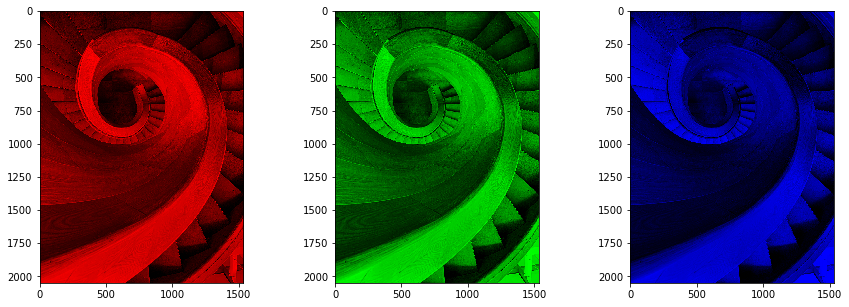

In [31]:
# set up
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import numpy as np
from skimage import io

# read in the image 
pic = imageio.imread('images/spiral.jpg') 

# plot images representing the red green and blue channels of the image 
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype' by default: 'numpy.float64'  # assing each channel      
     split_img[ :, :, c] = pic[ :, :, c] # display each channel     
     ax.imshow(split_img)
        
# save high res plot
plt.savefig('rgbExample.png', dpi = 300)

The original image is provided here comprised of these spectrums. These spectrums are emphasized here but do not represent the visible colors of the original image as can be seen in the following.

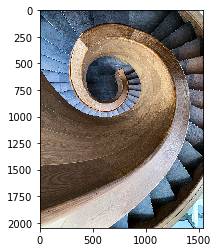

In [32]:
# show original image
plt.imshow(pic) 

Determine mean of each chromatic channel. Run k-means clustering algorithm on the image to determine color palette of the image. Assign calculated attributes to objects for plotting.

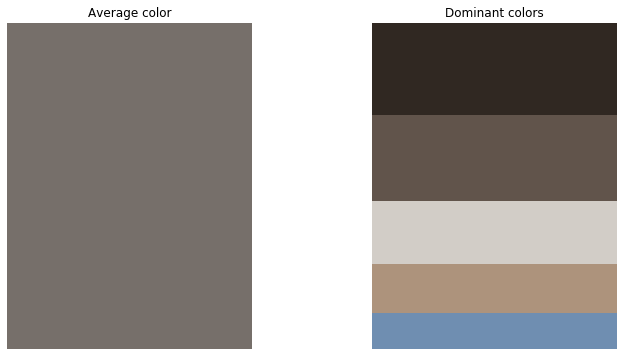

In [33]:
# get the mean of each chromatic channel as an array
average = pic.mean(axis=0).mean(axis=0)

# perform k means clustering to determine color palette of the image
pixels = np.float32(pic.reshape(-1, 3))
# set the 'pallete' to 5 colors
n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

# get the dominant color of the palette
dominant = palette[np.argmax(counts)]

avg_patch = np.ones(shape=pic.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_(pic.shape[0]*freqs)

dom_patch = np.zeros(shape=pic.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

# print average color and dominant colors palette
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
# save high res plot
plt.savefig('avgPalette.png', dpi = 300)
#print
plt.show(fig)
